In [31]:
conda install -c conda-forge python-kaleido

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kaleido-core-0.2.1         |       h0d85af4_0        71.9 MB  conda-forge
    mathjax-2.7.7              |       h694c41f_3        21.2 MB  conda-forge
    python-kaleido-0.2.1       |     pyhd8ed1ab_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        93.2 MB

The following NEW packages will be INSTALLED:

  kaleido-core       conda-forge/osx-64::kaleido-core-0.2.1-h0d85af4_0 
  mathjax            conda-forge/osx-64::mathjax-2.7.7-h694c41f_3 
  python-kaleido     conda-forge/noarch::python-kaleido-0.2.1-pyhd8ed1ab_0 



kaleido-core-0.2.1   | 71.9 MB   |                                       |   0% 
python-kal

In [140]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from kaleido.scopes.plotly import PlotlyScope
scope = PlotlyScope(
    plotlyjs="https://cdn.plot.ly/plotly-latest.min.js",
    # plotlyjs="/path/to/local/plotly.js",
)


In [88]:
control_data = pd.read_csv("control_group.csv", sep=";")
test_data = pd.read_csv("test_group.csv", sep=";")
                        

In [89]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


## **Data preparation** ##

Changing column names

In [91]:
control_data.columns = ["Campaign Name", "Date", "Amount spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received",
                        "Content Viewed", "Added to Cart", "Purchases"]
                        
                        

In [92]:
test_data.columns = ["Campaign Name", "Date", "Amount spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received",
                        "Content Viewed", "Added to Cart", "Purchases"]
                        

Checking for null data

In [93]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [94]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

**Handle missing data**
 - Fill in the missing value with the average value of the dataset 
 - Replace the missing value with the most common value within the same category 
 - Drop the missing values 

For this dataset, we'll replace the missing data with the mean value

In [95]:
control_data['Number of Impressions'].fillna(value = control_data['Number of Impressions'].mean(), inplace=True)
control_data['Reach'].fillna(value=control_data['Reach'].mean(), inplace=True)
control_data['Website Clicks'].fillna(value=control_data['Website Clicks'].mean(), inplace=True)
control_data['Searches Received'].fillna(value=control_data['Searches Received'].mean(), inplace=True)
control_data['Content Viewed'].fillna(value = control_data['Content Viewed'].mean(), inplace = True)
control_data['Added to Cart'].fillna(value = control_data['Added to Cart'].mean(), inplace = True)
control_data['Purchases'].fillna(value=control_data['Purchases'].mean(), inplace=True)

In [96]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

Create a new data set by merging the two datasets

**Think of merging here like JOIN in SQL. There are 4 types of joins: left, right, innter, and full outer. The same logic work for Python**


In [97]:
ab_test = control_data.merge(test_data, how='outer').sort_values(['Date'])
ab_test.reset_index(drop=True) #I want to insert index into my new data


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1205: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation.



,Campaign Name,Date,Amount spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Test Campaign,1.08.2019,3008,39550.000000,35820.000000,3038.000000,1946.000000,1069.000000,894.0,255.000000
2,Test Campaign,10.08.2019,2790,95054.000000,79632.000000,8125.000000,2312.000000,1804.000000,424.0,275.000000
3,Control Campaign,10.08.2019,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000
4,Test Campaign,11.08.2019,2420,83633.000000,71286.000000,3750.000000,2893.000000,2617.000000,1075.0,668.000000
5,Control Campaign,11.08.2019,2490,115247.000000,95843.000000,8137.000000,2941.000000,2486.000000,1887.0,475.000000
6,Test Campaign,12.08.2019,2831,124591.000000,10598.000000,8264.000000,2081.000000,1992.000000,1382.0,709.000000
7,Control Campaign,12.08.2019,2319,116639.000000,100189.000000,2993.000000,1397.000000,1147.000000,1439.0,794.000000
8,Test Campaign,13.08.2019,1972,65827.000000,49531.000000,7568.000000,2213.000000,2058.000000,1391.0,812.000000
9,Control Campaign,13.08.2019,2697,82847.000000,68214.000000,6554.000000,2390.000000,1975.000000,1794.0,766.000000


In [98]:
ab_test['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

## **AB testing to find the best marketing strategy** ##

**First, we'll examine the relationship between number of impressions and amount spent for each campaign**

In [137]:
figure = px.scatter(data_frame = ab_test,
                    x="Number of Impressions",
                    y="Amount spent",
                    size="Amount spent",
                    color="Campaign Name",
                    trendline = "ols")
figure.update_layout(title_text = 'Relationship between Impressions and Amount Spent',
                     title_font_size = 30,
                     title_font_color='blue',
                     autosize = False,
                     width =1050,
                     height=700)                       
with open("figure.png", "wb") as f:
    f.write(scope.transform(figure, format="png"))


The control campaign had more impressions as the amount spent on the campaign increased.

In [129]:
label = ["Total searchers from Control Campaign",
          "Total searches from Test Campaign"]
counts = [sum(control_data['Searches Received']),
          sum(test_data['Searches Received'])]
colors = ['beige', 'gold']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(autosize=False,
                  width=800,
                  height=800,
                  title_text = 'Control vs. Test: Searches',
                  title_font_color='blue',
                  title_font_size=35
                 )

fig.update_traces(hoverinfo = 'label+percent',
                  textinfo = 'value',
                  titleposition = 'top center',
                  textfont_size=25,
                  marker=dict(colors=colors,
                              line=dict(color='black', width=3)))
with open("fig.png", "wb") as f:
    f.write(scope.transform(fig, format="png"))

                  


The test campaign resulted more searches on the website

**Next, we'll examine website clicks from both campaigns**

In [134]:
labels = ["Clicks on Control campaign",
          "Clicks on Test campaign"]

counts = [sum(control_data['Website Clicks']),
          sum(test_data['Website Clicks'])]

colors = ['lightsalmon', 'crimson']

fig_1 = go.Figure(data=[go.Bar(x=labels, 
                             y=counts,
                             marker_color=colors)])

fig_1.update_layout(title_text='Control vs. Test: Website Clicks',
                  title_font_color='blue',
                  title_font_size=35,
                   autosize = False,
                   width = 1000,
                   height = 720)

with open("fig_1.png", "wb") as f:
    f.write(scope.transform(fig_1, format="png"))
                


                                                                                    


The test campaign boosted more website clicks

**Comparing views after reaching the websites for each campaign**

In [138]:
labels = ["Content Viewed for Control Campaign",
          "Content Viwed for Test Campaign"]
counts = [sum(control_data['Content Viewed']),
          sum(test_data['Content Viewed'])]
colors = ['darkcyan', 'cyan']

fig_2 = go.Figure(data=[go.Bar(x=labels,
                             y=counts,
                             marker_color=colors)])

fig_2.update_layout(title_text="Control vs. Test: Content Viewed",
                  title_font_size=35,
                  title_font_color="blue",
                   autosize=False,
                   width=1000,
                   height=720)
with open("fig_2.png", "wb") as f:
    f.write(scope.transform(fig_2, format="png"))



            

**Examine the products added to carts for both campaigns**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
plt.figure(figsize=(12,9))
sns.barplot(x=counts,y=labels, orient='h')
plt.title("Control vs. Test: Added to Cart")
plt.xlabel("Cart adds")
plt.ylabel("Campaign name")


**Examine the added to cart and purchases for campaign version**

<Figure size 864x648 with 0 Axes>

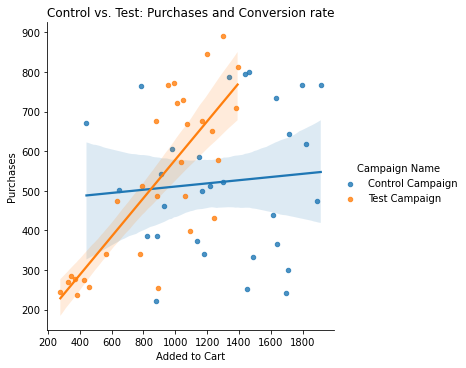

In [141]:
plt.figure(figsize=(12,9))

sns.lmplot(x='Added to Cart',
            y='Purchases',
            scatter_kws ={"s":20},
            hue='Campaign Name',
            data=ab_test)
plt.title('Control vs. Test: Purchases and Conversion rate')      
           
plt.show()

The control campaign resulted more sales (Purchases), but the Test campaign had higher conversion rate (the rate between added to cart and purchases)